# Importing libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import numpy as np
import pandas as pd
        
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Reading data

In [4]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
data.shape

(301, 9)

In [7]:
data.sample()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
299,city,2017,11.5,12.5,9000,Diesel,Dealer,Manual,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Checking missing values

In [11]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Checking unique values

In [13]:
data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

# Cleansing Data

In [55]:
data_cleaned = data.drop(columns=['Car_Name'])

data_cleaned['Car_Age'] = 2025 - data_cleaned['Year']

data_cleaned.drop(columns=['Year'], inplace=True)

data_cleaned.to_csv("car_data_cleaned.csv", index=False)

print("Data cleaning complete. File saved as 'car_data_cleaned.csv'")

Data cleaning complete. File saved as 'car_data_cleaned.csv'


# Dropping missing values if any

In [16]:
data.dropna()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Removing duplicate rows

In [18]:
data.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Outlier Detection and Removing

In [20]:
0.25-1.5*0.5

-0.5

In [21]:
0.75 + 1.5 * 0.5

1.5

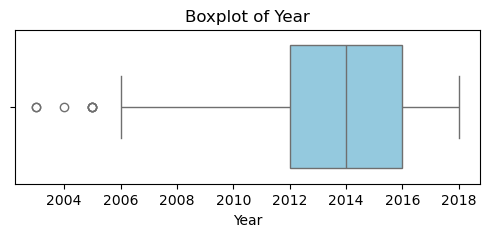

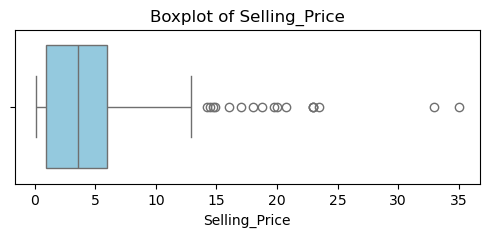

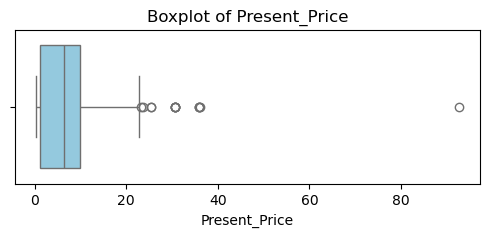

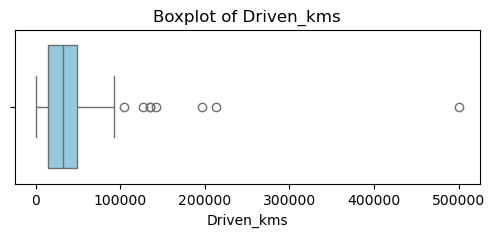

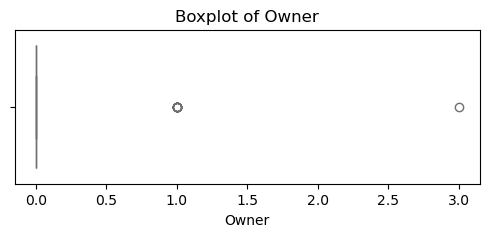

In [22]:
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [23]:
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data.shape

(261, 9)

# Normalization

In [64]:
numeric_cols = data.select_dtypes(include=['number']).columns

scaler = StandardScaler()

scaled_numeric_data = scaler.fit_transform(data[numeric_cols])

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols)

non_numeric_data = data.drop(columns=numeric_cols).reset_index(drop=True)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_data], axis=1)

print(scaled_data.shape)
print('*' * 60)
print(scaled_data.head())

(261, 9)
************************************************************
   Car_Name      Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0  1.100722  0.004882      -0.165821      -0.106661   -0.215719   0.452187   
1  1.232084 -0.419827       0.288044       0.714504    0.580224  -2.006579   
2  0.224976  1.279008       1.098519       0.778950   -1.215623   0.452187   
3  1.363446 -1.269244      -0.327916      -0.406023   -1.300192   0.452187   
4  1.188296  0.004882       0.239416       0.159438    0.552863  -2.006579   

   Selling_type  Transmission  Owner  
0      -0.73782      0.303398    0.0  
1      -0.73782      0.303398    0.0  
2      -0.73782      0.303398    0.0  
3      -0.73782      0.303398    0.0  
4      -0.73782      0.303398    0.0  


# Categorical into Numerical

In [35]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
categorical_cols

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [37]:
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Dimensionality Reduction (PCA)

In [40]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [42]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [44]:
 X_pca.shape

(261, 1)

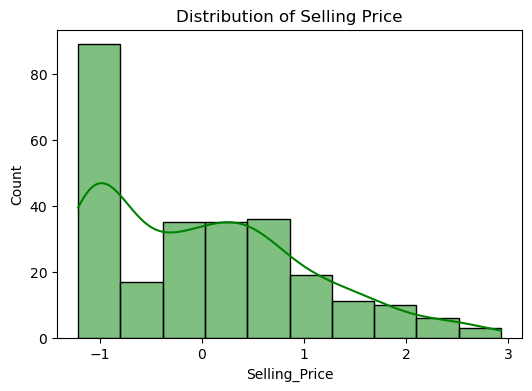

In [46]:
plt.figure(figsize=(6,4))
sns.histplot(y, kde=True, color='green')
plt.title('Distribution of Selling Price')
plt.show()

# Data Splitting

In [57]:
X_selected = X 
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (208, 8)
Test Set Shape: (53, 8)


# regression model

Mean Squared Error: 0.6536995137170021


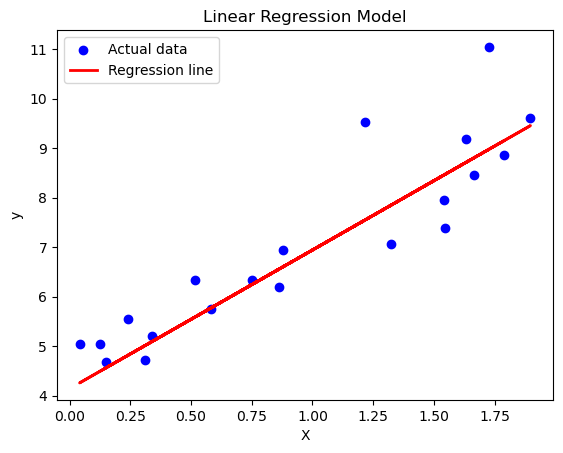

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Model')
plt.show()

# evaluation matrices

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 0.6536995137170021
Mean Absolute Error (MAE): 0.5913425779189777
Root Mean Squared Error (RMSE): 0.8085168605026132
R² Score: 0.8072059636181392


In [66]:
df_preds = pd.DataFrame({
    'Actual': y_test.squeeze(),
    'Predicted': y_pred.squeeze()
})

print("\nActual vs Predicted prices:")
print(df_preds.head(10))


Actual vs Predicted prices:
      Actual  Predicted
0   5.037904   4.498754
1   8.865488   9.152736
2   7.396518   8.466439
3   7.065746   7.852142
4   6.343712   5.591731
5   6.942462   6.607172
6   5.757981   5.778528
7  11.044395   8.975125
8   5.038909   4.258159
9   6.334288   6.239831
